<a href="https://colab.research.google.com/github/SruthiChilukuri/Coursera/blob/main/predicting_heart_failures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Capstone Project: Applied Data Science Capstone by IBM/Coursera

##Chapter-1
##Business problem:

* Heart failures are one of the most prominant conditions we have in world of today. The reasons can be many; from diabetes and cardiac arrests to high blood pressure and sometimes thyroid.

* It is noted that about 5.7 million americans have heart failure; as reported by the Centers for Disease Control and Prevention.

* There can be a machine learning approach that can estimate when a person is likely to suffer from this heart failure.



In [2]:
import pandas as pd
import numpy as np


In [3]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import drive
from oauth2client.client import GoogleCredentials
import warnings
warnings.filterwarnings("ignore")

## Data narrative

* The data was retrieved from the Kaggle open repository

* Link to the dataset: https://www.kaggle.com/andrewmvd/heart-failure-clinical-data
* As the business problem suggests, we have to pick those factors from the dataset that are most likely to influence the failure rate.

* These factors/attributes are "symptoms" in domain language

##Data understanding: Explorative data analysis

In [4]:
from google.colab import files

In [5]:
drive.mount('/content/drive')
column_names = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'death_event']
df = pd.read_csv("/content/drive/My Drive/heartfailure.csv", names = column_names, header = None)


Mounted at /content/drive


In [6]:
df.head(3)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
0,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
1,75,0,582,0,20,1,265000,1.9,130,1,0,4,1
2,55,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1


In [7]:
df = df.drop(df.index[0])

In [8]:
df.head(3)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
1,75,0,582,0,20,1,265000,1.9,130,1,0,4,1
2,55,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
3,65,0,146,0,20,0,162000,1.3,129,1,1,7,1


In [9]:
df.tail(2)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
298,45,0,2413,0,38,0,140000,1.4,140,1,1,280,0
299,50,0,196,0,45,0,395000,1.6,136,1,1,285,0


In [10]:
#checking for unique symptoms:
for i in df.columns:
  print(i, df[i].nunique())

age 47
anaemia 2
creatinine_phosphokinase 208
diabetes 2
ejection_fraction 17
high_blood_pressure 2
platelets 176
serum_creatinine 40
serum_sodium 27
sex 2
smoking 2
time 148
death_event 2


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 1 to 299
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       299 non-null    object
 1   anaemia                   299 non-null    object
 2   creatinine_phosphokinase  299 non-null    object
 3   diabetes                  299 non-null    object
 4   ejection_fraction         299 non-null    object
 5   high_blood_pressure       299 non-null    object
 6   platelets                 299 non-null    object
 7   serum_creatinine          299 non-null    object
 8   serum_sodium              299 non-null    object
 9   sex                       299 non-null    object
 10  smoking                   299 non-null    object
 11  time                      299 non-null    object
 12  death_event               299 non-null    object
dtypes: object(13)
memory usage: 32.7+ KB


In [12]:
#Lets count the patients with major symptoms who suffered/ not suffered with heart failure inspite of having such diseases
import plotly.express as px
img = df['anaemia'].value_counts().reset_index()
img.columns = ['anemia', 'count']
fig = px.bar(img, x='anemia', y = 'count', orientation = 'v', title = "count of patients with anemia for death_event 0 and 1")
fig.show()

In [13]:
#similarily let's do this for diabetes and smoking atributes
img1 = df['diabetes'].value_counts().reset_index()
img1.columns = ['diabetes', 'count']
fig = px.bar(img1, x='diabetes', y = 'count', orientation = 'v', title = "count of patients with diabetes for death_event 0 and 1")
fig.show()

In [14]:
img2 = df['smoking'].value_counts().reset_index()
img2.columns = ['smoking', 'count']
fig = px.bar(img2, x='smoking', y = 'count', orientation = 'v', title = "count of patients with smoking habit for death_event 0 and 1")
fig.show()

In [16]:
import plotly.express as px
fig = px.violin(df, y="age", x="sex", color="death_event", box=True, points="all", hover_data=df.columns)
fig.update_layout(title_text="Analysis of Age and Sex on Death Event")
fig.show()

In [18]:
fig = px.violin(df, y="diabetes", x="smoking", color="death_event", box=True, points="all", hover_data=df.columns)
fig.update_layout(title_text="Analysis of diabetes and Smoking on Death Event")
fig.show()

##Key takeaway's from the above visualizations:

* Anemia and heart failure doesnot show much correlation between them.
* 174 patients who didn't have diabetes died due to heart failure whereas 125 patients died having diabetes.
* 203 patients who didn't smoke suffered heart failure but only 96 patients who smoked died due to heart failure, suprisingly.

#Scaling the features before applying classification algorithms: Data preparation and preprocessing

In [19]:
df.head(4)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
1,75,0,582,0,20,1,265000,1.9,130,1,0,4,1
2,55,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
3,65,0,146,0,20,0,162000,1.3,129,1,1,7,1
4,50,1,111,0,20,0,210000,1.9,137,1,0,7,1


##Applying min-max scalar on columns: creatinine_phosphokinase, platelets, serum_sodium, age as these columns might potentially skew the model.

In [20]:
y = df.death_event
x = df.drop(columns=('death_event'), axis=1)

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,100))
x['platelets'] = scaler.fit_transform(x[['platelets']])
x['creatinine_phosphokinase'] = scaler.fit_transform(x[['creatinine_phosphokinase']])
x['age'] = scaler.fit_transform(x[['age']])
x['serum_sodium'] = scaler.fit_transform(x[['serum_sodium']])

x.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
1,63.636364,0,7.131921,0,20,1,29.082313,1.9,48.571429,1,0,4
2,27.272727,0,100.000000,0,38,0,28.883262,1.1,65.714286,1,0,6
3,45.454545,0,1.569278,0,20,0,16.595951,1.3,45.714286,1,1,7
4,18.181818,1,1.122735,0,20,0,22.414838,1.9,68.571429,1,0,7
5,45.454545,1,1.747895,1,20,0,36.598376,2.7,8.571429,0,0,8


In [24]:
y.count()

299

In [25]:
y.value_counts()

0    203
1     96
Name: death_event, dtype: int64

##I notice there is highly class imbalance; might skew the model and make it more biases. Hence I shall apply a sampling technique.


There are 3 types of sampling techniques essentially:

* **Stratified sampling** : strategically sample all the classes of the dataset to come up with a certain number of samples overall.

* **Random Undersampling** : removing samples from the dataset from the majority class

* **Random oversampling**:  adding more samples to the minority class



In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.25)


In [27]:
print(X_train)
print(X_test)
print(y_train)
print(y_test)

           age anaemia  creatinine_phosphokinase  ... sex smoking time
277  54.545455       0                  7.591222  ...   0       0  245
139  40.000000       0                  3.291656  ...   0       0  108
291   9.090909       0                  7.552947  ...   0       0  257
141  72.727273       0                  9.977035  ...   1       0  109
287  36.363636       0                  2.934422  ...   1       0  250
..         ...     ...                       ...  ...  ..     ...  ...
79   63.636364       1                  2.296504  ...   1       1   74
212  18.181818       0                  7.131921  ...   1       1  192
162   9.090909       1                  1.365144  ...   1       1  121
254  54.545455       0                  0.829293  ...   0       0  215
169  45.454545       0                  7.131921  ...   0       0  140

[224 rows x 12 columns]
           age anaemia  creatinine_phosphokinase  ... sex smoking time
150  36.363636       0                 28.553202  ..

##Applying Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr=LogisticRegression(max_iter=10000)
lr.fit(X_train,y_train)
p1=lr.predict(X_test)
s1=accuracy_score(y_test,p1)
print("Linear Regression Success Rate :", "{:.2f}%".format(100*s1))

Linear Regression Success Rate : 86.67%


##Applying Gradient Boost algorithm : Ensemble technique

In [31]:
from sklearn.ensemble import GradientBoostingClassifier
gradientboost_clf = GradientBoostingClassifier(max_depth=2)
gradientboost_clf.fit(X_train,y_train)
gradientboost_pred = gradientboost_clf.predict(X_test)

In [33]:
gradientboost_clf.score(X_test,y_test)

0.9333333333333333

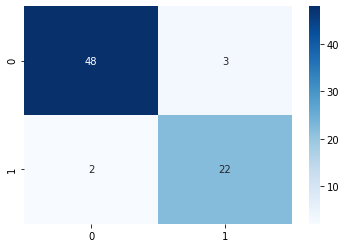

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf_matrix = confusion_matrix(y_test, gradientboost_pred)
sns.heatmap(cf_matrix, cmap='Blues',annot = True)

##Results and discussion

Analysis performed shows that:
* The dataset was skewed towards the 0'th class of "death_event" which is the Y label of the dataset.

* Anemia and heart failure doesnot show much correlation between them.

* 174 patients who didn't have diabetes died due to heart failure whereas 125 patients died having diabetes.

* 203 patients who didn't smoke suffered heart failure but only 96 patients who smoked died due to heart failure, suprisingly.

* Performing stratified sampling imporved the performance of the classifying algorithms

* Ensemble technique i.e. gradient boosting algorithm has generated an accuracy score of 93%. 

* The confusion matrix of the same has very less Type 1 and Type 2 errors 
